# Lineare Regression
### Beispiel: Zusammenhang Immobilenverkaufspreis und Qadratmeter

In [4]:
import pandas as pd

df = pd.read_csv("data/wohnungspreise.csv")
#df = pd.read_excel("./wohnungspreise.xlsx")
#df = pd.read_csv("xy.csv", sep="")
#df = pd.read_csv("xy.csv")


In [5]:
df
#df

,Quadratmeter,Verkaufspreis
0,70,351000
1,72,390000
2,91,473000
3,58,282000
4,49,300000
5,50,286000
6,48,228000
7,33,181000
8,61,308000
9,51,289000


In [6]:
df["Quadratmeter"]
#df[["x"]]

0      70
1      72
2      91
3      58
4      49
5      50
6      48
7      33
8      61
9      51
10     78
11     70
12     35
13     81
14     70
15     47
16     55
17     70
18     89
19     68
20     42
21     93
22     54
23     52
24     72
25     62
26     65
27     98
28     39
29     50
30     62
31     45
32     11
33     60
34     60
35     74
36     64
37     56
38     71
39     40
40     76
41     88
42     55
43     60
44     79
45    109
46     51
47     48
48     25
49     88
Name: Quadratmeter, dtype: int64

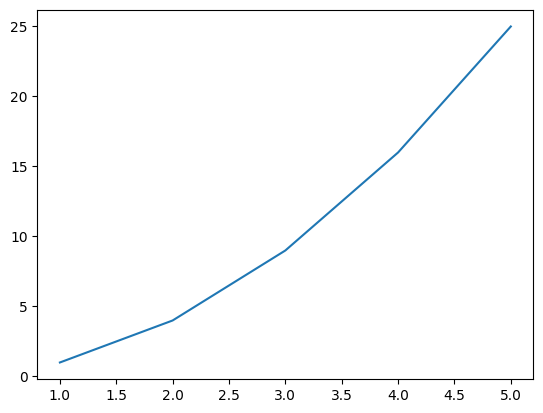

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
#                  x                    y
plt.plot([1,2,3,4,5], [1,4,9,16,25])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[["Quadratmeter"]], df[["Verkaufspreis"]])

print("b: Intercept: " + str(model.intercept_))
print("a: Coef: " + str(model.coef_))

b: Intercept: [3143.28481869]
a: Coef: [[5071.35242619]]


In [9]:
# Verkaufspreis = 3143.28481869 + 5071.35242619 * Quadratmeter
# y = 3143.28481869 + 5071.35242619 * x

In [10]:
print(3143.28481869 + 5071.35242619 * 60)

307424.43039009


In [11]:
model.predict([[60]])

C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[307424.43039023]])

In [12]:
model.predict([[60],[61], [62]])

C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[307424.43039023],
       [312495.78281643],
       [317567.13524262]])

In [13]:
min_x = min(df["Quadratmeter"])
max_x = max(df["Quadratmeter"])

predicted = model.predict([[min_x], [200]])

C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


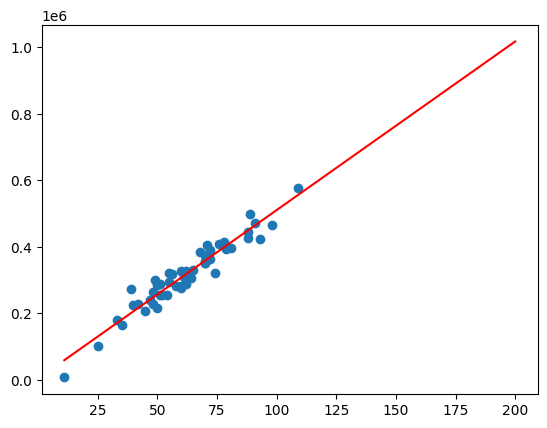

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df["Quadratmeter"], df["Verkaufspreis"])
plt.plot([min_x, 200], predicted, color = "red")

plt.show()

In [15]:
meineWohnung_qm = 65
#***Preisprognose mit einer Funktion!?***

In [16]:
def preisprognose(qm):
    b = model.intercept_[0]
    a = model.coef_[0][0]
    return ((a * qm) + b)


In [17]:
preisprognose(meineWohnung_qm)

332781.1925211964

In [18]:
#wobei das noch einfacher geht:
model.predict([[ 61 ]])

C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[312495.78281643]])

In [19]:
def preisprognose(qm):
    return model.predict([[ qm ]])[0][0]

In [20]:
preisprognose(meineWohnung_qm)

C:\Users\michi\OneDrive\MSC DV\Python\venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


332781.1925211964